# ARIMA in Crude Oil, Gasoline RBOB, Heating Oil

### Các thư viện cần thiết

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [6]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.1 MB/s eta 0:00:00


In [7]:
from pmdarima.arima import auto_arima

# Train-Test 7:3

# Crude Oil WTI - 7:3

In [8]:
# Đọc file dữ liệu và loại bỏ những dòng bị thiếu
df= pd.read_csv('Crude Oil.csv')
df = df.dropna() # Drop missing values

In [9]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df["Date"] = df["Date"].dt.strftime('%d-%m-%Y')
df = df.iloc[::-1].reset_index(drop=True)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,02-01-2019,46.54,45.80,47.78,44.35,850480,1.42
1,03-01-2019,47.09,46.26,47.49,45.35,788720,1.18
2,04-01-2019,47.96,46.90,49.22,46.65,817280,1.85
3,07-01-2019,48.52,48.30,49.79,48.11,819940,1.17
4,08-01-2019,49.78,48.73,49.95,48.31,765980,2.60
...,...,...,...,...,...,...,...
1289,19-03-2024,83.47,82.85,83.85,82.39,76810,0.91
1290,20-03-2024,81.68,83.20,83.21,81.44,26040,-2.14
1291,21-03-2024,81.07,81.49,81.92,80.30,266860,-0.75
1292,22-03-2024,80.63,80.84,81.45,80.42,231100,-0.54


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1294 non-null   object 
 1   Price     1294 non-null   float64
 2   Open      1294 non-null   float64
 3   High      1294 non-null   float64
 4   Low       1294 non-null   float64
 5   Vol.      1294 non-null   int64  
 6   Change %  1294 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 70.9+ KB


In [11]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [12]:
# Tách dữ liệu train-test 7:3
train_size = int(0.7 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [13]:
# Tạo hàm đánh giá sai số cho dự đoán (sử dụng MAE, MAPE, RMSE)
def evaluate(test,pred):
  print('- Calculate Error Values -')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

In [14]:
# Training model
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Tìm mô hình ARIMA tối ưu nhất
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4538.353, Time=4.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4621.977, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4553.257, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4536.997, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4620.179, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4534.928, Time=1.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4536.362, Time=1.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4536.410, Time=1.76 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4535.659, Time=0.87 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4542.466, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4533.586, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4535.525, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4551.616, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4535.061, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [15]:
# Testing model
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [16]:
# Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predict closing prices for the next 30 days:')
print(y_next_30_days)

Predict closing prices for the next 30 days:
[89.95946571 90.25085871 90.3106769  90.3229566  90.32547742 90.3259949
 90.32610113 90.32612294 90.32612741 90.32612833 90.32612852 90.32612856
 90.32612857 90.32612857 90.32612857 90.32612857 90.32612857 90.32612857
 90.32612857 90.32612857 90.32612857 90.32612857 90.32612857 90.32612857
 90.32612857 90.32612857 90.32612857 90.32612857 90.32612857 90.32612857]


- Calculate Error Values -
MAE:  11.211254047023614
MAPE:  14.854896278274051
RMSE:  12.791065243422045


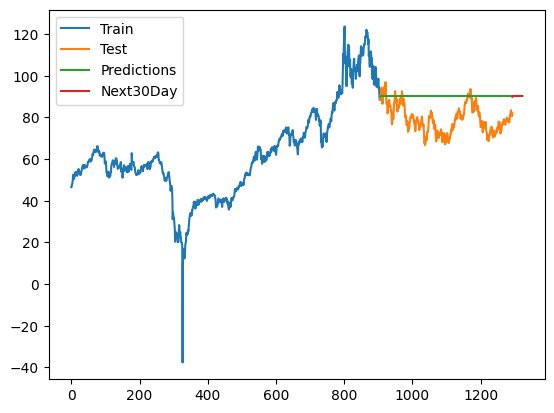

In [17]:
# Đánh giá mô hình dựa trên các đánh giá sai số và vẽ đồ thị đường
evaluate(y_test, y_pred)

plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Gasoline RBOB - 7:3

In [18]:
# Đọc file dữ liệu, loại bỏ những dòng bị thiếu và chuẩn hóa dữ liệu
df= pd.read_csv('Gasoline RBOB.csv')
df = df.dropna() # Drop missing values

In [19]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df["Date"] = df["Date"].dt.strftime('%d-%m-%Y')
df = df.iloc[::-1].reset_index(drop=True)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,02-01-2019,1.4150,1.3136,1.3790,1.2685,87520,7.81
1,03-01-2019,1.4377,1.3160,1.3676,1.3016,57750,1.60
2,04-01-2019,1.4515,1.3364,1.3981,1.3293,66360,0.96
3,07-01-2019,1.4505,1.3560,1.3945,1.3389,79090,5.95
4,08-01-2019,1.4740,1.3466,1.3722,1.3385,74920,1.62
...,...,...,...,...,...,...,...
1325,21-03-2024,2.7271,2.7370,2.7376,2.7119,150,-0.22
1326,22-03-2024,2.7398,2.7090,2.7456,2.7090,610,0.47
1327,25-03-2024,2.7484,2.7370,2.7603,2.7310,620,1.11
1328,26-03-2024,2.7006,2.7489,2.7500,2.6980,390,-1.74


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1330 non-null   object 
 1   Price     1330 non-null   float64
 2   Open      1330 non-null   float64
 3   High      1330 non-null   float64
 4   Low       1330 non-null   float64
 5   Vol.      1330 non-null   int64  
 6   Change %  1330 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 72.9+ KB


In [21]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [22]:
# Tách dữ liệu train-test 7:3
train_size = int(0.7 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [23]:
# Tạo hàm đánh giá sai số cho dự đoán (sử dụng MAE, MAPE, RMSE)
def evaluate(test,pred):
  print('- Calculate Error Values -')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

In [24]:
# Training model
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Tìm mô hình ARIMA tối ưu nhất
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2665.374, Time=1.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2511.834, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2595.082, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2653.095, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2513.663, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2663.127, Time=2.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2665.596, Time=1.96 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2661.130, Time=0.85 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2649.996, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-2665.777, Time=1.76 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2666.802, Time=0.60 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-2666.364, Time=0.53 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-2665.311, Time=2.42 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-2667.989, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0

ARIMA(order=(3, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [25]:
# Testing model
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [26]:
# Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predict closing prices for the next 30 days:')
print(y_next_30_days)

Predict closing prices for the next 30 days:
[2.27697029 2.30425696 2.28448613 2.27375155 2.28010336 2.28355183
 2.28179164 2.28057036 2.28109811 2.28149961 2.28135377 2.28121784
 2.28125913 2.28130374 2.28129275 2.28127801 2.28128089 2.28128569
 2.28128499 2.28128343 2.28128359 2.28128409 2.28128406 2.2812839
 2.2812839  2.28128395 2.28128395 2.28128394 2.28128394 2.28128394]


- Calculate Error Values -
MAE:  0.22525714595929863
MAPE:  8.810731318630673
RMSE:  0.2737851499250694


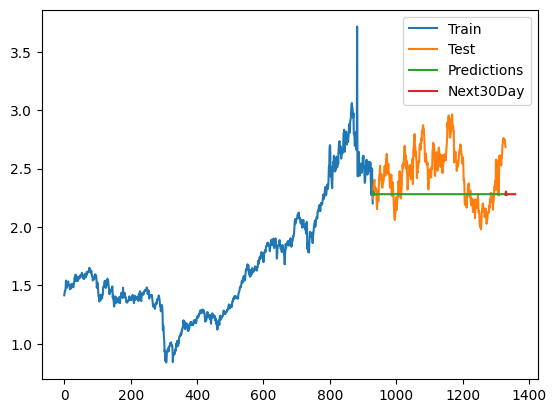

In [27]:
# Đánh giá mô hình dựa trên các đánh giá sai số và vẽ đồ thị đường
evaluate(y_test, y_pred)

plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Heating Oil - 7:3

In [28]:
# Đọc file dữ liệu, loại bỏ những dòng bị thiếu và chuẩn hóa dữ liệu
df= pd.read_csv('Heating Oil.csv')
df = df.dropna() # Drop missing values

In [29]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df["Date"] = df["Date"].dt.strftime('%d-%m-%Y')
df = df.iloc[::-1].reset_index(drop=True)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,02-01-2019,1.7006,1.6895,1.7489,1.6424,65510,0.89
1,03-01-2019,1.7420,1.7008,1.7466,1.6801,56550,2.43
2,04-01-2019,1.7692,1.7300,1.8035,1.7236,61140,1.56
3,07-01-2019,1.7784,1.7809,1.8245,1.7764,57180,0.52
4,08-01-2019,1.8270,1.7810,1.8296,1.7757,57590,2.73
...,...,...,...,...,...,...,...
1314,21-03-2024,2.6688,2.6932,2.7026,2.6360,24850,-1.00
1315,22-03-2024,2.6534,2.6630,2.6904,2.6471,27590,-0.58
1316,25-03-2024,2.6786,2.6644,2.7062,2.6533,29060,0.95
1317,26-03-2024,2.6218,2.6845,2.6870,2.6097,24090,-2.12


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1319 non-null   object 
 1   Price     1319 non-null   float64
 2   Open      1319 non-null   float64
 3   High      1319 non-null   float64
 4   Low       1319 non-null   float64
 5   Vol.      1319 non-null   int64  
 6   Change %  1319 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 72.3+ KB


In [31]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [32]:
# Tách dữ liệu train-test 7:3
train_size = int(0.7 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [33]:
# Tạo hàm đánh giá sai số cho dự đoán (sử dụng MAE, MAPE, RMSE)
def evaluate(test,pred):
  print('- Calculate Error Values -')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

In [34]:
# Training model
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Tìm mô hình ARIMA tối ưu nhất
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2172.598, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2177.990, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2178.841, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2173.719, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2177.461, Time=0.72 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2178.206, Time=0.54 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2183.058, Time=1.92 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2189.458, Time=2.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2179.925, Time=1.06 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-2183.077, Time=3.77 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-2192.418, Time=2.38 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-2189.404, Time=1.14 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-2190.700, Time=2.82 sec
 ARIMA(1,1,5)(0,0,0)[0] i

ARIMA(order=(2, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [35]:
# Testing model
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [36]:
# Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predict closing prices for the next 30 days:')
print(y_next_30_days)

Predict closing prices for the next 30 days:
[3.77147415 3.76832019 3.74665848 3.73824664 3.75585057 3.77320245
 3.78218755 3.78425806 3.78317187 3.78161483 3.78065386 3.78033876
 3.78037663 3.78050708 3.78060425 3.78064457 3.78064781 3.78063788
 3.78062856 3.78062389 3.7806229  3.78062354 3.78062439 3.78062489
 3.78062505 3.78062502 3.78062495 3.7806249  3.78062488 3.78062488]


- Calculate Error Values -
MAE:  0.8613973616883356
MAPE:  31.576243161360622
RMSE:  0.939763437404333


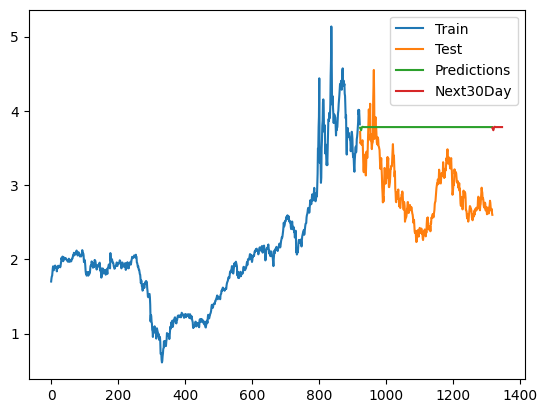

In [37]:
# Đánh giá mô hình dựa trên các đánh giá sai số và vẽ đồ thị đường
evaluate(y_test, y_pred)

plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Train-Test 8:2

# Crude Oil WTI - 8:2

In [38]:
# Đọc file dữ liệu và loại bỏ những dòng bị thiếu
df= pd.read_csv('Crude Oil.csv')
df = df.dropna() # Drop missing values

In [39]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df["Date"] = df["Date"].dt.strftime('%d-%m-%Y')
df = df.iloc[::-1].reset_index(drop=True)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,02-01-2019,46.54,45.80,47.78,44.35,850480,1.42
1,03-01-2019,47.09,46.26,47.49,45.35,788720,1.18
2,04-01-2019,47.96,46.90,49.22,46.65,817280,1.85
3,07-01-2019,48.52,48.30,49.79,48.11,819940,1.17
4,08-01-2019,49.78,48.73,49.95,48.31,765980,2.60
...,...,...,...,...,...,...,...
1289,19-03-2024,83.47,82.85,83.85,82.39,76810,0.91
1290,20-03-2024,81.68,83.20,83.21,81.44,26040,-2.14
1291,21-03-2024,81.07,81.49,81.92,80.30,266860,-0.75
1292,22-03-2024,80.63,80.84,81.45,80.42,231100,-0.54


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1294 non-null   object 
 1   Price     1294 non-null   float64
 2   Open      1294 non-null   float64
 3   High      1294 non-null   float64
 4   Low       1294 non-null   float64
 5   Vol.      1294 non-null   int64  
 6   Change %  1294 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 70.9+ KB


In [41]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [42]:
# Tách dữ liệu train-test 8:2
train_size = int(0.8 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [43]:
# Tạo hàm đánh giá sai số cho dự đoán (sử dụng MAE, MAPE, RMSE)
def evaluate(test,pred):
  print('- Calculate Error Values -')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

In [44]:
# Training model
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Tìm mô hình ARIMA tối ưu nhất
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5124.681, Time=1.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5208.109, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5140.005, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5124.144, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5206.175, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5121.361, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5122.815, Time=0.95 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5122.715, Time=1.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5122.122, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5128.189, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5119.568, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5122.310, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5138.122, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5121.038, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [45]:
# Testing model
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [46]:
# Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predict closing prices for the next 30 days:')
print(y_next_30_days)

Predict closing prices for the next 30 days:
[72.64751686 72.9472758  73.01547639 73.03099326 73.03452363 73.03532685
 73.0355096  73.03555118 73.03556064 73.03556279 73.03556328 73.03556339
 73.03556342 73.03556342 73.03556343 73.03556343 73.03556343 73.03556343
 73.03556343 73.03556343 73.03556343 73.03556343 73.03556343 73.03556343
 73.03556343 73.03556343 73.03556343 73.03556343 73.03556343 73.03556343]


- Calculate Error Values -
MAE:  5.715461895923748
MAPE:  7.0207267329740874
RMSE:  7.4386802673048145


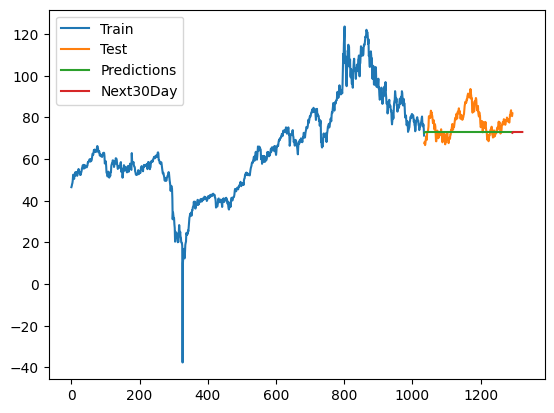

In [47]:
# Đánh giá mô hình dựa trên các đánh giá sai số và vẽ đồ thị đường
evaluate(y_test, y_pred)

plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Gasoline RBOB - 8:2

In [48]:
# Đọc file dữ liệu, loại bỏ những dòng bị thiếu và chuẩn hóa dữ liệu
df= pd.read_csv('Gasoline RBOB.csv')
df = df.dropna() # Drop missing values

In [49]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df["Date"] = df["Date"].dt.strftime('%d-%m-%Y')
df = df.iloc[::-1].reset_index(drop=True)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,02-01-2019,1.4150,1.3136,1.3790,1.2685,87520,7.81
1,03-01-2019,1.4377,1.3160,1.3676,1.3016,57750,1.60
2,04-01-2019,1.4515,1.3364,1.3981,1.3293,66360,0.96
3,07-01-2019,1.4505,1.3560,1.3945,1.3389,79090,5.95
4,08-01-2019,1.4740,1.3466,1.3722,1.3385,74920,1.62
...,...,...,...,...,...,...,...
1325,21-03-2024,2.7271,2.7370,2.7376,2.7119,150,-0.22
1326,22-03-2024,2.7398,2.7090,2.7456,2.7090,610,0.47
1327,25-03-2024,2.7484,2.7370,2.7603,2.7310,620,1.11
1328,26-03-2024,2.7006,2.7489,2.7500,2.6980,390,-1.74


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1330 non-null   object 
 1   Price     1330 non-null   float64
 2   Open      1330 non-null   float64
 3   High      1330 non-null   float64
 4   Low       1330 non-null   float64
 5   Vol.      1330 non-null   int64  
 6   Change %  1330 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 72.9+ KB


In [51]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [52]:
# Tách dữ liệu train-test 8:2
train_size = int(0.8 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [53]:
# Tạo hàm đánh giá sai số cho dự đoán (sử dụng MAE, MAPE, RMSE)
def evaluate(test,pred):
  print('- Calculate Error Values -')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

In [54]:
# Training model
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Tìm mô hình ARIMA tối ưu nhất
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2986.694, Time=2.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2857.255, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2933.251, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2975.008, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2858.989, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2985.801, Time=1.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2987.173, Time=1.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2985.587, Time=1.51 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2975.147, Time=0.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-2988.422, Time=3.67 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2990.384, Time=0.84 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-2988.434, Time=0.88 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-2986.395, Time=1.24 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-2991.499, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0

ARIMA(order=(3, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [55]:
# Testing model
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [56]:
# Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predict closing prices for the next 30 days:')
print(y_next_30_days)

Predict closing prices for the next 30 days:
[2.49268651 2.48996688 2.47948115 2.48146145 2.4836581  2.48375
 2.48293669 2.4829166  2.48310848 2.48315019 2.48309198 2.48307766
 2.48309139 2.48309749 2.48309388 2.48309191 2.48309269 2.48309335
 2.48309319 2.48309299 2.48309301 2.48309307 2.48309307 2.48309305
 2.48309305 2.48309306 2.48309306 2.48309306 2.48309306 2.48309306]


- Calculate Error Values -
MAE:  0.2045422468996455
MAPE:  8.520248707376872
RMSE:  0.2402667715729863


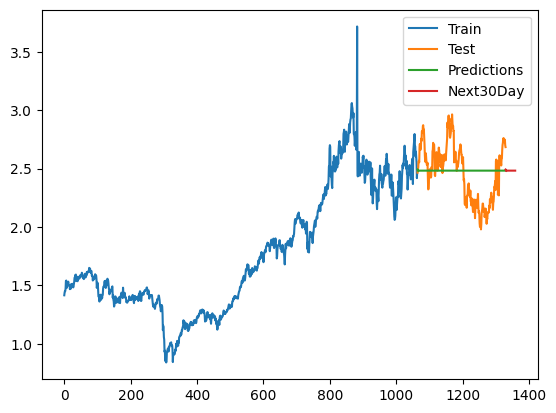

In [57]:
# Đánh giá mô hình dựa trên các đánh giá sai số và vẽ đồ thị đường
evaluate(y_test, y_pred)

plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Heating Oil - 8:2

In [58]:
# Đọc file dữ liệu, loại bỏ những dòng bị thiếu và chuẩn hóa dữ liệu
df= pd.read_csv('Heating Oil.csv')
df = df.dropna() # Drop missing values

In [59]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df["Date"] = df["Date"].dt.strftime('%d-%m-%Y')
df = df.iloc[::-1].reset_index(drop=True)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,02-01-2019,1.7006,1.6895,1.7489,1.6424,65510,0.89
1,03-01-2019,1.7420,1.7008,1.7466,1.6801,56550,2.43
2,04-01-2019,1.7692,1.7300,1.8035,1.7236,61140,1.56
3,07-01-2019,1.7784,1.7809,1.8245,1.7764,57180,0.52
4,08-01-2019,1.8270,1.7810,1.8296,1.7757,57590,2.73
...,...,...,...,...,...,...,...
1314,21-03-2024,2.6688,2.6932,2.7026,2.6360,24850,-1.00
1315,22-03-2024,2.6534,2.6630,2.6904,2.6471,27590,-0.58
1316,25-03-2024,2.6786,2.6644,2.7062,2.6533,29060,0.95
1317,26-03-2024,2.6218,2.6845,2.6870,2.6097,24090,-2.12


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1319 non-null   object 
 1   Price     1319 non-null   float64
 2   Open      1319 non-null   float64
 3   High      1319 non-null   float64
 4   Low       1319 non-null   float64
 5   Vol.      1319 non-null   int64  
 6   Change %  1319 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 72.3+ KB


In [61]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [62]:
# Tách dữ liệu train-test 8:2
train_size = int(0.8 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [63]:
# Tạo hàm đánh giá sai số cho dự đoán (sử dụng MAE, MAPE, RMSE)
def evaluate(test,pred):
  print('- Calculate Error Values -')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

In [64]:
# Training model
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Tìm mô hình ARIMA tối ưu nhất
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2272.915, Time=1.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2243.304, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2258.025, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2259.855, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2245.147, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2259.199, Time=1.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2266.256, Time=1.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-2266.509, Time=5.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-2276.816, Time=5.67 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2273.584, Time=2.04 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-2281.524, Time=3.42 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-2280.009, Time=4.61 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-2277.593, Time=3.10 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-2278.057, Time=2.95 sec
 ARIMA(4,1,2)(0,0,0

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [65]:
# Testing model
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [66]:
# Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predict closing prices for the next 30 days:')
print(y_next_30_days)

Predict closing prices for the next 30 days:
[2.79569903 2.80591757 2.79266755 2.80607907 2.80161932 2.80395095
 2.80586448 2.80522114 2.80687114 2.80695667 2.8074624  2.80794326
 2.80812275 2.80846462 2.80864481 2.80882437 2.80898426 2.80909622
 2.80920612 2.80928932 2.80936043 2.80942096 2.80946937 2.80951111
 2.80954522 2.80957371 2.80959758 2.80961727 2.80963379 2.80964749]


- Calculate Error Values -
MAE:  0.24503134918858138
MAPE:  9.052557547147236
RMSE:  0.2899729205840959


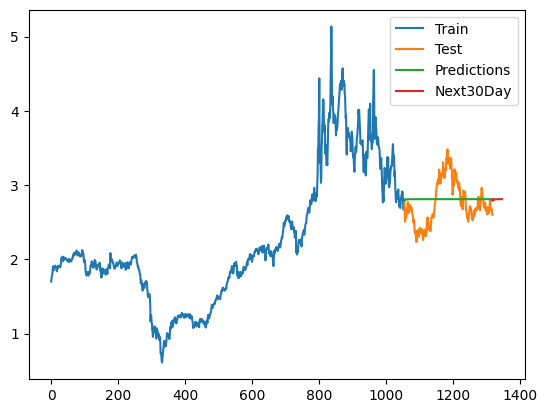

In [67]:
# Đánh giá mô hình dựa trên các đánh giá sai số và vẽ đồ thị đường
evaluate(y_test, y_pred)

plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Train-Test 9:1

# Crude Oil WTI - 9:1

In [68]:
# Đọc file dữ liệu và loại bỏ những dòng bị thiếu
df= pd.read_csv('Crude Oil.csv')
df = df.dropna() # Drop missing values

In [69]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df["Date"] = df["Date"].dt.strftime('%d-%m-%Y')
df = df.iloc[::-1].reset_index(drop=True)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,02-01-2019,46.54,45.80,47.78,44.35,850480,1.42
1,03-01-2019,47.09,46.26,47.49,45.35,788720,1.18
2,04-01-2019,47.96,46.90,49.22,46.65,817280,1.85
3,07-01-2019,48.52,48.30,49.79,48.11,819940,1.17
4,08-01-2019,49.78,48.73,49.95,48.31,765980,2.60
...,...,...,...,...,...,...,...
1289,19-03-2024,83.47,82.85,83.85,82.39,76810,0.91
1290,20-03-2024,81.68,83.20,83.21,81.44,26040,-2.14
1291,21-03-2024,81.07,81.49,81.92,80.30,266860,-0.75
1292,22-03-2024,80.63,80.84,81.45,80.42,231100,-0.54


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1294 non-null   object 
 1   Price     1294 non-null   float64
 2   Open      1294 non-null   float64
 3   High      1294 non-null   float64
 4   Low       1294 non-null   float64
 5   Vol.      1294 non-null   int64  
 6   Change %  1294 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 70.9+ KB


In [71]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [72]:
# Tách dữ liệu train-test 9:1
train_size = int(0.9 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [73]:
# Tạo hàm đánh giá sai số cho dự đoán (sử dụng MAE, MAPE, RMSE)
def evaluate(test,pred):
  print('- Calculate Error Values -')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

In [74]:
# Training model
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Tìm mô hình ARIMA tối ưu nhất
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5673.317, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5757.464, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5687.365, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5672.313, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5755.675, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5669.401, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5670.957, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5670.918, Time=0.63 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5670.177, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5676.050, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5667.934, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5670.761, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5685.709, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5669.515, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [75]:
# Testing model
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [76]:
# Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predict closing prices for the next 30 days:')
print(y_next_30_days)

Predict closing prices for the next 30 days:
[91.06062454 90.96592907 90.94454673 90.93971857 90.93862836 90.9383822
 90.93832661 90.93831406 90.93831122 90.93831058 90.93831044 90.93831041
 90.9383104  90.9383104  90.9383104  90.9383104  90.9383104  90.9383104
 90.9383104  90.9383104  90.9383104  90.9383104  90.9383104  90.9383104
 90.9383104  90.9383104  90.9383104  90.9383104  90.9383104  90.9383104 ]


- Calculate Error Values -
MAE:  12.455106225676477
MAPE:  16.46138771812322
RMSE:  13.696781300058852


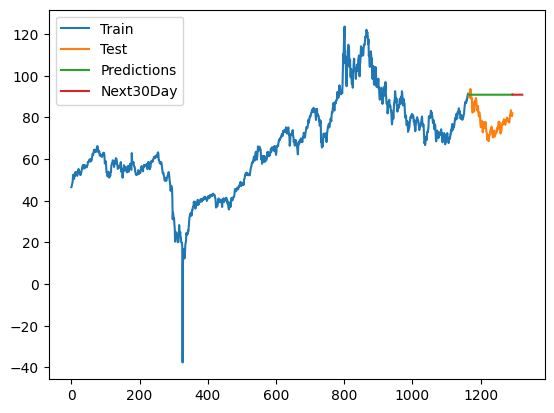

In [77]:
# Đánh giá mô hình dựa trên các đánh giá sai số và vẽ đồ thị đường
evaluate(y_test, y_pred)

plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Gasoline RBOB - 9:1

In [78]:
# Đọc file dữ liệu, loại bỏ những dòng bị thiếu và chuẩn hóa dữ liệu
df= pd.read_csv('Gasoline RBOB.csv')
df = df.dropna() # Drop missing values

In [79]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df["Date"] = df["Date"].dt.strftime('%d-%m-%Y')
df = df.iloc[::-1].reset_index(drop=True)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,02-01-2019,1.4150,1.3136,1.3790,1.2685,87520,7.81
1,03-01-2019,1.4377,1.3160,1.3676,1.3016,57750,1.60
2,04-01-2019,1.4515,1.3364,1.3981,1.3293,66360,0.96
3,07-01-2019,1.4505,1.3560,1.3945,1.3389,79090,5.95
4,08-01-2019,1.4740,1.3466,1.3722,1.3385,74920,1.62
...,...,...,...,...,...,...,...
1325,21-03-2024,2.7271,2.7370,2.7376,2.7119,150,-0.22
1326,22-03-2024,2.7398,2.7090,2.7456,2.7090,610,0.47
1327,25-03-2024,2.7484,2.7370,2.7603,2.7310,620,1.11
1328,26-03-2024,2.7006,2.7489,2.7500,2.6980,390,-1.74


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1330 non-null   object 
 1   Price     1330 non-null   float64
 2   Open      1330 non-null   float64
 3   High      1330 non-null   float64
 4   Low       1330 non-null   float64
 5   Vol.      1330 non-null   int64  
 6   Change %  1330 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 72.9+ KB


In [81]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [82]:
# Tách dữ liệu train-test 9:1
train_size = int(0.9 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [83]:
# Tạo hàm đánh giá sai số cho dự đoán (sử dụng MAE, MAPE, RMSE)
def evaluate(test,pred):
  print('- Calculate Error Values -')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

In [84]:
# Training model
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Tìm mô hình ARIMA tối ưu nhất
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3337.803, Time=2.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3238.586, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3302.263, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3328.887, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3240.274, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3339.188, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3341.127, Time=0.46 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-3339.242, Time=0.66 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3340.170, Time=1.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-3337.241, Time=1.23 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-3342.189, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-3330.149, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-3340.233, Time=0.26 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-3340.283, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [85]:
# Testing model
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [86]:
# Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predict closing prices for the next 30 days:')
print(y_next_30_days)

Predict closing prices for the next 30 days:
[2.63665118 2.64180776 2.64180776 2.64180776 2.64180776 2.64180776
 2.64180776 2.64180776 2.64180776 2.64180776 2.64180776 2.64180776
 2.64180776 2.64180776 2.64180776 2.64180776 2.64180776 2.64180776
 2.64180776 2.64180776 2.64180776 2.64180776 2.64180776 2.64180776
 2.64180776 2.64180776 2.64180776 2.64180776 2.64180776 2.64180776]


- Calculate Error Values -
MAE:  0.35307823162026303
MAPE:  16.062383469158164
RMSE:  0.3939992252320537


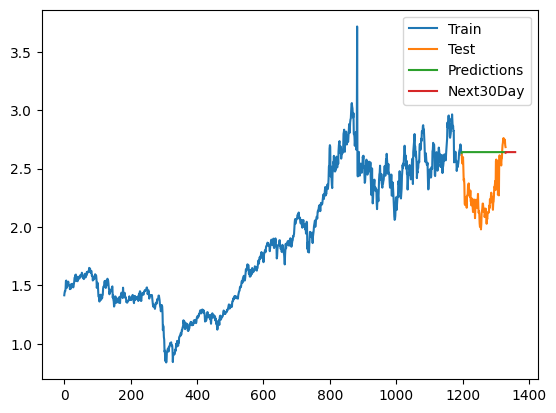

In [87]:
# Đánh giá mô hình dựa trên các đánh giá sai số và vẽ đồ thị đường
evaluate(y_test, y_pred)

plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Heating Oil - 9:1

In [88]:
# Đọc file dữ liệu, loại bỏ những dòng bị thiếu và chuẩn hóa dữ liệu
df= pd.read_csv('Heating Oil.csv')
df = df.dropna() # Drop missing values

In [89]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df["Date"] = df["Date"].dt.strftime('%d-%m-%Y')
df = df.iloc[::-1].reset_index(drop=True)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,02-01-2019,1.7006,1.6895,1.7489,1.6424,65510,0.89
1,03-01-2019,1.7420,1.7008,1.7466,1.6801,56550,2.43
2,04-01-2019,1.7692,1.7300,1.8035,1.7236,61140,1.56
3,07-01-2019,1.7784,1.7809,1.8245,1.7764,57180,0.52
4,08-01-2019,1.8270,1.7810,1.8296,1.7757,57590,2.73
...,...,...,...,...,...,...,...
1314,21-03-2024,2.6688,2.6932,2.7026,2.6360,24850,-1.00
1315,22-03-2024,2.6534,2.6630,2.6904,2.6471,27590,-0.58
1316,25-03-2024,2.6786,2.6644,2.7062,2.6533,29060,0.95
1317,26-03-2024,2.6218,2.6845,2.6870,2.6097,24090,-2.12


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1319 non-null   object 
 1   Price     1319 non-null   float64
 2   Open      1319 non-null   float64
 3   High      1319 non-null   float64
 4   Low       1319 non-null   float64
 5   Vol.      1319 non-null   int64  
 6   Change %  1319 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 72.3+ KB


In [91]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [92]:
# Tách dữ liệu train-test 9:1
train_size = int(0.9 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [93]:
# Tạo hàm đánh giá sai số cho dự đoán (sử dụng MAE, MAPE, RMSE)
def evaluate(test,pred):
  print('- Calculate Error Values -')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

In [94]:
# Training model
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Tìm mô hình ARIMA tối ưu nhất
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2625.759, Time=2.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2594.996, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2609.093, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2610.722, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2596.671, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2610.181, Time=1.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2622.994, Time=2.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-2621.212, Time=2.92 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-2627.608, Time=3.81 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2625.585, Time=2.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-2632.453, Time=3.03 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-2631.869, Time=3.59 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-2629.144, Time=6.16 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-2629.455, Time=3.36 sec
 ARIMA(4,1,2)(0,0,0

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [95]:
# Testing model
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [96]:
# Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predict closing prices for the next 30 days:')
print(y_next_30_days)

Predict closing prices for the next 30 days:
[3.286533   3.28898289 3.28662031 3.28739666 3.28721411 3.2867017
 3.28701182 3.28668827 3.28668798 3.28667511 3.28656165 3.2865792
 3.2865276  3.28650395 3.28649516 3.28646936 3.28646266 3.28645095
 3.28644147 3.28643647 3.28642964 3.28642568 3.28642206 3.28641882
 3.28641666 3.28641455 3.28641298 3.2864117  3.2864106  3.28640977]


- Calculate Error Values -
MAE:  0.4730946918784732
MAPE:  17.384733370105568
RMSE:  0.514170923788628


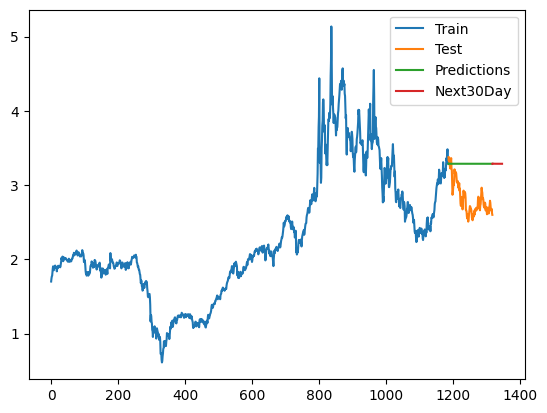

In [97]:
# Đánh giá mô hình dựa trên các đánh giá sai số và vẽ đồ thị đường
evaluate(y_test, y_pred)

plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()